# Valores Atipicos
_______________________________________


## 1. Importar librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Cargar archivo

In [21]:
data = pd.read_csv('../Recursos/inmuebles_sin_nulos.csv')
display(data)

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/2004 00:00,Carmen
1,1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/2007 00:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/2030 00:00,María
3333,3333,29/04/2007 00:00,Piso,Alquiler,Girona,55.0,454080,19/06/2030 00:00,María
3334,3334,30/04/2007 00:00,Suelo,Venta,Tarragona,78.0,740688,19/06/2030 00:00,María
3335,3335,30/04/2007 00:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/2030 00:00,María


- 2.1 Verificar que no hayan valores nulos

In [22]:
valoresNulos = data.isnull().sum()
print(valoresNulos)

valoresNulosCSV = data.isnull().sum().sum()
print(f'\nValores nulos en el CSV: {valoresNulosCSV}')

Unnamed: 0      0
Fecha Alta      0
Tipo            0
Operación       0
Provincia       0
Superficie      4
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

Valores nulos en el CSV: 4


- 2.2 Corregimos los valores nulos con el promedio

In [23]:
# Realizamos la copia de data
data1 = data.copy()
data1['Superficie'] = data1['Superficie'].fillna(round(data['Superficie'].mean(), 1))

# Corroboramos valores nulos
valNull = data1.isnull().sum()
print(valNull)

Unnamed: 0      0
Fecha Alta      0
Tipo            0
Operación       0
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64


## 3. Valores atipicos

- 3.1 Histograma de variables cuantitativas

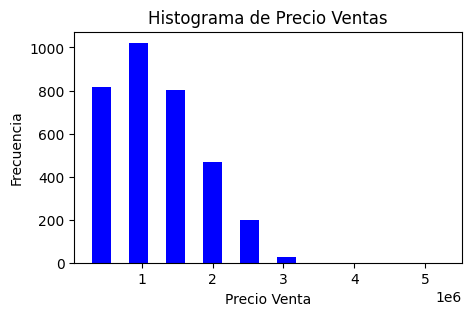

In [24]:
fig = plt.figure(figsize = (5,3))
plt.hist(x=data1['Precio Venta'], color='blue', rwidth=0.5)
plt.title('Histograma de Precio Ventas')
plt.xlabel('Precio Venta')
plt.ylabel('Frecuencia')

plt.show()

- 3.2 Diagrama caja bigote

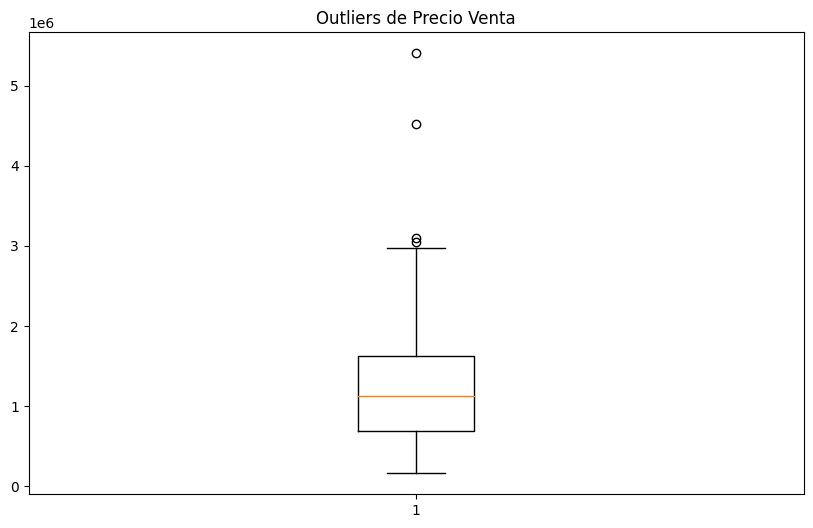

In [25]:
fig = plt.figure(figsize = (10,6))
plt.boxplot(data1['Precio Venta'])
plt.title('Outliers de Precio Venta')
plt.show()

- 3.3 Metodo desviacion estandar

In [26]:
# Encontramos los valores extremos
y = data1['Precio Venta']
limiteSuperior = y.mean() + 3*y.std()
limiteInferior = y.mean() - 3*y.std()

print(f"Limite superior permitido : {round(limiteSuperior,2)}")
print(f"Limite inferior permitido : {round(limiteInferior,2)}")

# Encontramos Outliers
outliers = data1[(y>limiteSuperior) | (y<limiteInferior)]
print(f"\nOutliers:\n{outliers}")


Limite superior permitido : 3094998.79
Limite inferior permitido : -685995.87

Outliers:
      Unnamed: 0        Fecha Alta        Tipo Operación  Provincia  \
154          154  03/03/2004 00:00       Suelo  Alquiler     Girona   
2853        2853  02/11/2006 00:00        Casa     Venta     Girona   
2891        2891  13/11/2006 00:00  Industrial     Venta  Barcelona   

      Superficie  Precio Venta       Fecha Venta Vendedor  
154        185.0       5403595  02/10/2004 00:00    Pedro  
2853       190.0       3105230  19/06/2030 00:00    Jesús  
2891       262.0       4517034  19/06/2030 00:00    Luisa  


- 3.3 Obtenemos datos limpios

In [27]:
data_clean = data1[(y<=limiteSuperior) & (y>=limiteInferior)]
display(data_clean)

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/2004 00:00,Carmen
1,1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/2007 00:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/2030 00:00,María
3333,3333,29/04/2007 00:00,Piso,Alquiler,Girona,55.0,454080,19/06/2030 00:00,María
3334,3334,30/04/2007 00:00,Suelo,Venta,Tarragona,78.0,740688,19/06/2030 00:00,María
3335,3335,30/04/2007 00:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/2030 00:00,María


- 3.4 Realizamos diagrama bigote con data_clean

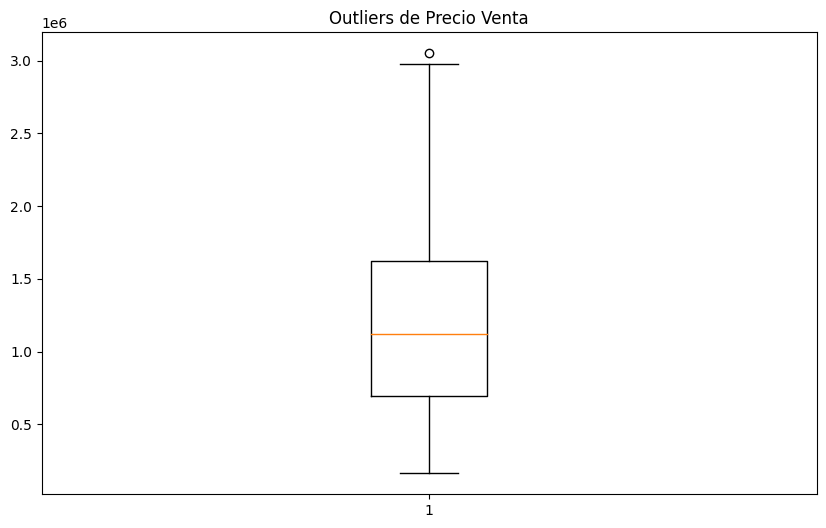

In [28]:
# Por el metodo de std se eliminaron 3 valores, sin embargo por el metodo de boxplot nos salian 4 valores.
# Por tanto, sigue apareciendo 1 valor en la variable data_clean
fig = plt.figure(figsize = (10,6))
plt.boxplot(data_clean['Precio Venta'])
plt.title('Outliers de Precio Venta')
plt.show()

- 3.5 Metodo IQR (metodo que utiliza boxplot)

In [30]:
# Encontramos los valores extremos
y = data1["Precio Venta"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr

print(f"Limite superior permitido : {round(limiteSuperiorIQR,2)}")
print(f"Limite inferior permitido : {round(limiteInferiorIQR,2)}")

# Encontramos Outliers
outliers = data1[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n{outliers}")

Limite superior permitido : 3012316.5
Limite inferior permitido : -694127.5

Outliers:
      Unnamed: 0        Fecha Alta        Tipo Operación  Provincia  \
44            44  20/01/2004 00:00     Oficina  Alquiler  Barcelona   
154          154  03/03/2004 00:00       Suelo  Alquiler     Girona   
2853        2853  02/11/2006 00:00        Casa     Venta     Girona   
2891        2891  13/11/2006 00:00  Industrial     Venta  Barcelona   

      Superficie  Precio Venta       Fecha Venta Vendedor  
44         287.0       3051058  02/01/2005 00:00  Joaquín  
154        185.0       5403595  02/10/2004 00:00    Pedro  
2853       190.0       3105230  19/06/2030 00:00    Jesús  
2891       262.0       4517034  19/06/2030 00:00    Luisa  


- 3.6 Obtenemos datos limpios

In [31]:
data_clean_iqr = data1[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
display(data_clean_iqr)

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/2004 00:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/2004 00:00,Carmen
1,1,01/01/2004 00:00,Local,Venta,Girona,185.0,1945424,19/04/2004 00:00,Pedro
2,2,01/01/2004 00:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/2004 00:00,Joaquín
3,3,02/01/2004 00:00,Parking,Alquiler,Girona,285.0,1121906,27/04/2004 00:00,Jesús
4,4,02/01/2004 00:00,Suelo,Venta,Tarragona,152.0,185000,10/07/2004 00:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/2007 00:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/2030 00:00,María
3333,3333,29/04/2007 00:00,Piso,Alquiler,Girona,55.0,454080,19/06/2030 00:00,María
3334,3334,30/04/2007 00:00,Suelo,Venta,Tarragona,78.0,740688,19/06/2030 00:00,María
3335,3335,30/04/2007 00:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/2030 00:00,María


- 3.7 Realizamos diagrama bigote con data_clean_iqr

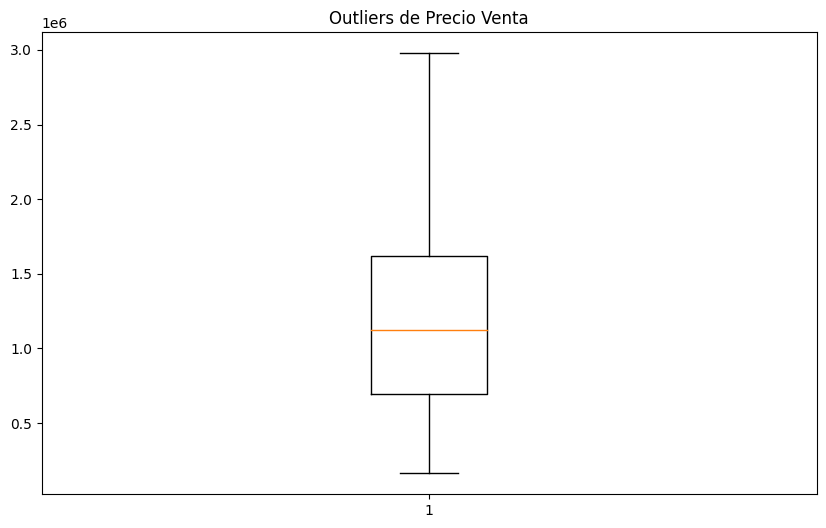

In [32]:
# Los 4 outliers identificados en un principio ahora ya no son parte del df
fig = plt.figure(figsize = (10,6))
plt.boxplot(data_clean_iqr['Precio Venta'])
plt.title('Outliers de Precio Venta')
plt.show()